# **Written Exam Economics winter 2023/2024**
**Advanced Macroeconomics: Structural Vector Autoregressive Analysis**

The topic for this project examination is the estimation of an IS-LM model following the analysis in Galí (1992). The basic underlying economic model is the same as in Galí but we will use the presence of cointegration to help us to identify the structural VAR model. The purpose of the examination is to assess your understanding of structural vector autoregressive (VAR) models. Substantial emphasis will be placed on using your programming skills in Matlab/Python. Specifically, the examination assesses theoretical and practical knowledge of structural vector autoregressive models within stationary and non-stationary frameworks

including assessing empirical results, using different approaches to identify VAR models and be able to use Matlab/Python to generate empirical results. You can use any Matlab/Python functions that you have programmed yourself or any function uploaded to Absalon during the course except when otherwise stated. You are not allowed to use other programs or built-in Matlab/Python functions except for those that are specified in the questions below. The assignment requires some additional coding.

Most questions in the examination are applied, concerning the empirical example outlined below. When you answer these empirical questions, please explain and motivate your answers as detailed as possible, preferably with reference to the underlying theory.

Consider the following data generating pro cess (DGP). Let the time series vector $x_t=\begin{pmatrix}y_t&i_t&\pi_t&m_t\end{pmatrix}'$ where $y_t$ is output, $i_t$ is the nominal interest rate, $\pi_t$ is inflation, and $m_t$ is money growth. We assume that the time series vector is generated by the following VAR model
$$x_t=\nu+A_1x_{t−1}+\cdots +A_px_{t−p}+u_t\tag{1}$$
where $\nu$ is a constant and $u_t$ is a vector of reduced form residuals with covariance matrix $\Sigma_u$. Assume that this time series vector is integrated of order one and that the cointegration rank is $r$.

As in the paper by Galí we assume that $m_t−\pi_t$ and $i_t−\pi_t$ are stationary relationships such that cointegration vector in this system is given by
$$\beta'=
\begin{pmatrix}
0&1&−1&0\\
0&0&−1&1
\end{pmatrix}$$
Under these assumptions we can rewrite the VAR model as the following VECM
$$
\Delta x_t=\nu+\alpha\beta'x_{t−1}+\Gamma_1\Delta x_{t−1}+\cdots+\Gamma_{p−1}\Delta x_{t−p−1}+v_t\tag{1}
$$
The assignment will guide you through an empirical analysis of the time series vector stated above including estimation and analysis of the cointegrated VAR model, identification of the structural cointegrated VAR model and robustness analysis.

In the solution below we use the data set `1000.xlsx`

<center>

### **Preamble**

</center>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
font_props = FontProperties(family='Times New Roman', size=10)
import seaborn as sns
sns.set_palette("pastel") 
 
from IPython.display import display, Math, clear_output
from sympy import Matrix
from sympy import latex, symbols

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.tsatools import vech

from scipy.optimize import least_squares
from scipy.optimize import fsolve
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import f

from pathlib import Path
import pandas as pd
import numpy as np
import random
import sys
import os

import warnings
warnings.filterwarnings("ignore", message="Setting `xtol` below the machine epsilon")
warnings.filterwarnings("ignore", message="Setting `gtol` below the machine epsilon")
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

current_dir = Path.cwd()
sys.path.append(f"{current_dir}")

# Save output:
Python_path = None
LaTeX_path = None # LaTeX editor Texifier for macOS (https://www.texifier.com) highly recommended


pd.options.display.float_format = '{:.4f}'.format  # Ændrer til 4 decimale4

color_navy = '#{:02x}{:02x}{:02x}'.format(85, 108, 131)
colors_navy = ["#a5c6e2", "#80afd6", "#5b97ca", "#3b7fb9", "#2f6694", "#234c6f", "#17334a", "#0b1925"]
colors_pastel = sns.color_palette("pastel", 10)
colors_pastel

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [1]:
# Data:
result = pd.read_excel(f'{current_dir}/Data & Estimates/1000_2023.xlsx')

# Very important:
list_of_info = ["Dates: 1975-2020 (Quarterly)","Output (GDP)","Nominal Interest Rate", "Inflation","Money Growth"]
list_of_info_latex = [r"$Y_t$", r"$i_t$", r"$\pi_t$",r"$m_t$"]

K = len(result.drop(columns=["Dates"]).columns)

# Package/module:
from Structural_Vector_Autoregressive_Analysis import BaseClass

# Initialiser BaseClass med ønskede parametre
Base_initialize = BaseClass(LaTeX_path = None,                          # Can be None or LaTeX_path if LaTeX_path =! None it will save Tables/Plots to the LaTeX_path
                            Python_path = Python_path,                  # Path to Python folder
                            list_of_info_latex = list_of_info_latex,    # List of variable
                            list_of_info = list_of_info,                # List of names for each variable 
                            # Path to JCV.npy, PSSCV.npy and SigLevels.xlsx
                            path = f"{current_dir}/Data & Estimates/")    

from Structural_Vector_Autoregressive_Analysis import Initial_Tools as SVAR_IT
SVAR_IT = SVAR_IT(Base_initialize, date_column="Dates")

##  $\text{Q1}$
The data is already transformed and ordered as in $x_t$. Plot the data and perform graphical analysis in order to assess the degree of integration of all four variables.

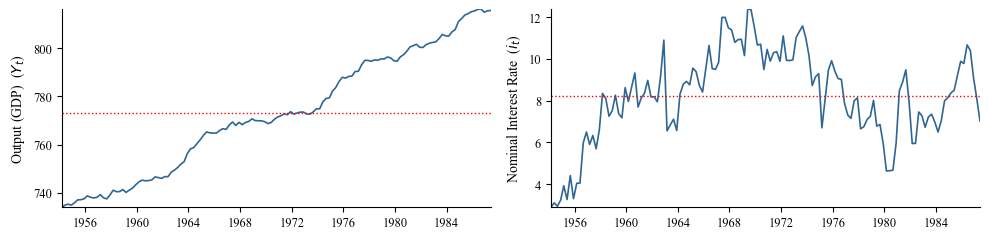

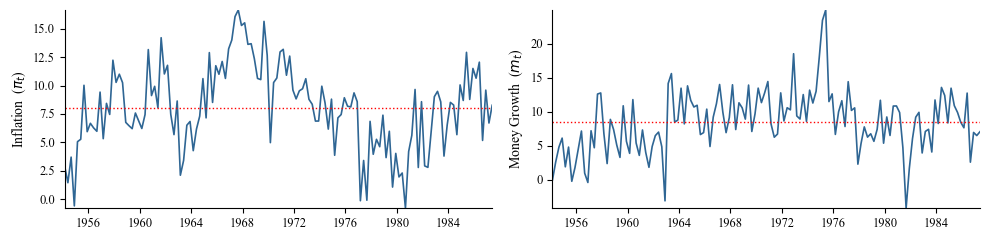

All variables have the same sample size: 134


,Mean,Median,Min,Max,Std. Dev.
Output (GDP),772.9494,771.0598,733.9927,816.2336,24.9334
Nominal Interest Rate,8.2235,8.3260,2.9000,12.3852,2.1510
Inflation,8.0691,8.3221,-0.7967,16.6511,3.6633
Money Growth,8.5053,8.4293,-4.1662,24.9772,4.4901


In [2]:
SVAR_IT.Data_plot(result,Save=False)
SVAR_IT.Descriptive_Statistics(result, display_data=True)
y_clean_data = SVAR_IT.clean_data(result,display_data=False)

##  $\text{Q2}$
Formulate a well-specied VAR model for xt. Explain your workow and how you argue
for your choice of the number of autoregressive lags in the VAR model

In [3]:
from Structural_Vector_Autoregressive_Analysis import Lag_Order_Determination as SVAR_LOD
SVAR_LOD = SVAR_LOD(Base_initialize, y_dataframe=y_clean_data)

from Structural_Vector_Autoregressive_Analysis import Diagnostic_Testing as SVAR_DT
SVAR_DT = SVAR_DT(Base_initialize, y_dataframe=y_clean_data)
 
from Structural_Vector_Autoregressive_Analysis import Univariate_Diagnostic_Testing as SVAR_UDT
SVAR_UDT = SVAR_UDT(Base_initialize, y_dataframe=y_clean_data)

from Structural_Vector_Autoregressive_Analysis import Testing_Cointegration as SVAR_TC
SVAR_TC = SVAR_TC(Base_initialize, y_dataframe=y_clean_data)

In [4]:
_ = SVAR_LOD.Information_Criteria(maximum_lag_length=12, Trend=False, Show=True)

Lag,SIC,HQ,AIC
0,12.339836,12.285242,12.247901
1,4.626484,4.353515,4.166809
2,4.603122,4.111777,3.775706
3,5.094686,4.384965,3.899530
4,5.525516,4.597419,3.962619
5,5.924840,4.778368,3.994203
6,6.407200,5.042352,4.108822
7,6.959730,5.376507,4.293612
8,7.415631,5.614031,4.381772
9,7.821966,5.801991,4.420367


In [5]:
_ = SVAR_LOD.Top_Down_Sequence(maximum_lag_length=12, Trend=False, Show=True)

Lag,Log. Likelihood,LR test,p-value
0,1486.243953,,
1,468.350674,1017.893279,0.000000
2,388.636109,79.714565,0.000000
3,371.742614,16.893495,0.392521
4,347.439475,24.303139,0.083090
5,319.292743,28.146732,0.030367
6,301.276280,18.016463,0.322934
7,291.820656,9.455623,0.893471
8,270.576166,21.244490,0.169303
9,243.284752,27.291414,0.038356


In [6]:
SVAR_LOD.Combined_Lag_Selection(maximum_lag_length=12, Trend = False, LaTeX=False)

Lag,SIC,HQ,AIC,LR Test
0,12.340,12.285,12.248,
1,4.626,4.354,4.167,1017.893***
2,4.603,4.112,3.776,79.715***
3,5.095,4.385,3.900,16.893
4,5.526,4.597,3.963,24.303*
5,5.925,4.778,3.994,28.147**
6,6.407,5.042,4.109,18.016
7,6.960,5.377,4.294,9.456
8,7.416,5.614,4.382,21.244
9,7.822,5.802,4.420,27.291**


##  $\text{Q3}$
Does it matter if we use the VAR model for $x_t$, a VAR model for $\Delta x_t$ or the VECM model as given above to determine the lag length? Derive formally the relationships between the residuals ut and vt in the VAR and VECM models above.

##  $\text{Q4}$
Test for multivariate autocorrelation, heteroscedasticity and normality. Does your model satisfy the underlying assumptions? If the multivariate tests of autocorrelation and ARCH reject the null hypotheses, apply univariate tests for autocorrelation and ARCH in the residuals in each equation. You are allowed to use the built-in Matlab functions lbqtest and archtest or the function owndiag included in the Python package `Ownfunctions.py` as alternatives to own functions.

In [7]:
SVAR_DT.Eigenvalue_Short_Table(maximum_lag_length=3, LaTeX=False)

Lag,"No Constant, No Trend",Constant Only,Trend Only,Constant and Trend
1,1.000782,1.002264,1.000608,0.917156
2,1.000804,0.999537,1.000774,0.935687
3,1.000807,0.999099,1.000795,0.936278


In [8]:
Constant = True
Trend = False
p = 2 # VAR Lags

_, _, _, residuals, _, SIGMA = SVAR_DT.VAR_estimation_with_exogenous(lags=p,Constant=Constant,Trend=Trend)
lags_q = 2 # ARCH Lags
lag_h = 4  # Autocorrelation (LM and Portmanteau)

In [9]:
SVAR_DT.Multivariate_ARCH(residuals=residuals, lags_q=lags_q)

,Test,Doornik_Hendry
0,Test statistic,187.2813
1,P-value,0.7312
2,Degrees of freedom,200.0000


In [10]:
SVAR_DT.Multivariate_Normality(residuals=residuals)

,Test,Doornik_Hansen,Lutkepohl
0,Joint test statistic:,45.5230,40.4945
1,P-value,0.0000,0.0000
2,Degrees of freedom,8.0000,8.0000
3,Skewness only,14.4618,7.7280
4,P-value,0.0060,0.1021
5,Kurtosis only,31.0613,32.7665
6,P-value,0.0000,0.0000


In [11]:
SVAR_DT.Multivariate_Portmanteau(residuals=residuals, lag_h=lag_h, lags=p)

,,Portmanteau,Modified Portmanteau
0,Test Statistic,45.1669,46.2379
1,p-value,0.0614,0.0496
2,Degrees of Freedom,32.0000,32.0000


In [12]:
SVAR_DT.Autocorrelation_LM_Table(lags=p, Constant=Constant, Trend=Trend, Exogenous=None, lags_h=lag_h, LaTeX=False)

Lags (h),Breusch Godfrey,Edgerton Shukur
1,19.071,1.124
2,41.236,1.229
3,62.632*,1.294*
4,79.388*,1.237


In [13]:
SVAR_DT.Diagnostic_Table(residuals = residuals, 
                         Constant = Constant, 
                         lags_q = lags_q, 
                         lags_h = lag_h,
                         Trend = Trend, 
                         lags = p,
                         LaTeX = False)

,Doornik Hendry,Doornik Hansen,Lutkepohl,Portmanteau,Portmanteau Modified
Joint test,187.281,45.523***,40.495***,45.167*,46.238**
Skewness test,,14.462***,7.728,,
Kurtosis test,,31.061***,32.767***,,


#### $$\text{Univariate Tests for {\small ARCH}, Normality, and Autocorrelation}$$

In [14]:
print("\nUnivariate ARCH Test - Het_ARCH")
display(SVAR_UDT.Univariate_ARCH_Test(residuals=residuals,lags=p))
print("\nUnivariate Normality Test - Jarque_Bera")
display(SVAR_UDT.Univariate_Normality_Test(residuals=residuals))
print("\nUnivariate Autocorrelation Test - Ljung-Box")
display(SVAR_UDT.Univariate_Autocorrelation_Test(residuals=residuals, lag_h=lag_h))

SVAR_UDT.Combined_Univariate_LaTeX(residuals=residuals,lags=p,lag_h=lag_h, LaTeX=False)


Univariate ARCH Test - Het_ARCH


,Hypothesis,P-Value,Test Statistic,Critical Value
Output (GDP),0.0000,0.6591,0.8338,5.9915
Nominal Interest Rate,0.0000,0.5155,1.3254,5.9915
Inflation,0.0000,0.3293,2.2215,5.9915
Money Growth,0.0000,0.1039,4.5283,5.9915



Univariate Normality Test - Jarque_Bera


,Hypothesis,P-Value,Test Statistic,Critical Value
Output (GDP),0.0000,0.8472,0.3316,5.9915
Nominal Interest Rate,1.0000,0.0000,33.2061,5.9915
Inflation,1.0000,0.0051,10.5544,5.9915
Money Growth,1.0000,0.0000,23.8720,5.9915



Univariate Autocorrelation Test - Ljung-Box


,Output (GDP),Nominal Interest Rate,Inflation,Money Growth
Lag 1,0.1522,0.0353,0.3351,0.0074
Lag 2,0.2434,0.0588,0.6021,0.0099
Lag 3,1.0913,0.2105,3.5711,0.0239
Lag 4,1.8107,0.9901,6.5541,1.3403


##  $\text{Q5}$
For your preferred model, proceed by testing for cointegration using the Matlab/Python function jcitest. Explain your approach and how you nd the number of cointegration vectors, that is, the rank $r$, in the system allowing for ($i$) a constant term in the cointegration vector and ($ii$) both a constant and a linear trend in the cointegration vector. Do you use dierent sources of information when determining the rank? If so, explain how you arrive at your decision.

In [15]:
_ = SVAR_TC.Trace_Test(lags=p, p_value_threshold=0.05, LaTeX=False)

,1/H2/n,2/H1*/co,3/H1/ci,4/H*/cili,5/H/colo
0,127.28*** (λ=0.3912),130.771*** (λ=0.3956),101.537*** (λ=0.3687),111.656*** (λ=0.3695),107.289*** (λ=0.3689)
1,61.762*** (λ=0.2689),64.312*** (λ=0.2714),40.823*** (λ=0.2134),50.77*** (λ=0.2235),46.533*** (λ=0.2162)
2,20.413*** (λ=0.0959),22.525** (λ=0.097),9.146 (λ=0.0669),17.381 (λ=0.0734),14.38 (λ=0.0592)
3,7.106*** (λ=0.0524),9.054* (λ=0.0663),0.007 (λ=0.0001),7.316 (λ=0.0539),6.318** (λ=0.0467)
Pantula,4,3,2,2,2


Sample: 132. Lag length: VAR: p=2 and VEC: p=1. Test statistic with Eigenvalue
in parentheses and the significance level as a superscript (10%, 5% and 1%).
Pantula principle at a 5%


In [16]:
cointegration_vectors, rank = SVAR_TC.Cointegration_Vectors(preferred_model=3, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=None, 
                                rank=None,LaTeX=True)

# Alternatively, for normalise_on_element use [1, 1, 1, 1] or [1,2,3,4],  
# but if so the length must equal 1 or K

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 101.537 p-value: 0.001 ( *** ) and λ = 0.3687
     Rank: 1 LR: 40.823 p-value: 0.0025 ( *** ) and λ = 0.2134
     Rank: 2 LR: 9.146 p-value: 0.401 (  ) and λ = 0.0669

 \begin{pmatrix}  -0.00273 & -0.41610 & 0.05363 & 0.31206 \end{pmatrix} 

 \begin{pmatrix}  -0.00817 & 0.59060 & -0.44534 & 0.01183 \end{pmatrix} 


In [17]:
cointegration_vectors4, rank4 = SVAR_TC.Cointegration_Vectors(preferred_model=4, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=None, 
                                rank=None,LaTeX=True)

# Alternatively, for normalise_on_element use [1, 1, 1, 1] or [1,2,3,4],  
# but if so the length must equal 1 or K

Model: 4  |  Model: H* ("cili") [constant and linear trend in coint vec, linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 111.656 p-value: 0.001 ( *** ) and λ = 0.3695
     Rank: 1 LR: 50.77 p-value: 0.0072 ( *** ) and λ = 0.2235
     Rank: 2 LR: 17.381 p-value: 0.4263 (  ) and λ = 0.0734

 \begin{pmatrix}  0.02216 & 0.43702 & -0.06781 & -0.30962 \end{pmatrix} 

 \begin{pmatrix}  0.08305 & 0.62225 & -0.46897 & 0.02762 \end{pmatrix} 


## $\text{Q6}$
Impose your preferred rank and test the null hypothesis that there is no linear trend in the cointegration vectors.

In [18]:
LRtest, pval, _, _, Brest, _, _, _, _ = \
    SVAR_TC.johcontest(r=rank, test=['bcon'], cons=SVAR_TC.zero_array(K+1)[K], model='H*', lags=float(p-1), alpha=0.05)

threshold = 0.05

decision = "cannot reject" if pval > threshold else "reject"
conclusion = "include a constant but not\na trend" if pval > threshold else "include both a constant\nand a trend"

print(f"The LR test statistic is {LRtest:.4f} with a p-value of {pval:.4f}.\n"
      f"We {decision} the null that the trend in the cointegration \n"
      f"vector is zero, suggesting we should {conclusion}.")

print("\n   The freely estimated cointegration vector:")

display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(Brest.T)+r"'\end{equation}"))

The LR test statistic is 1.8835 with a p-value of 0.3899.
We cannot reject the null that the trend in the cointegration 
vector is zero, suggesting we should include a constant but not
a trend.

   The freely estimated cointegration vector:


<IPython.core.display.Math object>

## $\text{Q7}$
Continue with your preferred rank and the preferred specication of the deterministic component in the cointegration vector found in the previous question and test hypotheses on the cointegration space using the Matlab function jcontest or the Python function johcontest included in the package TracetestNew.py. Test for exclusion, stationarity and weak exogeneity. Explain the meanings of these tests and draw conclusions

In [19]:
print(f"For rank = {rank} and lags = {p-1}")
SVAR_TC.Stationary_Exclusion_Exogeneity(rank=float(rank), lags=p, LaTeX=False)

# Long run time

For rank = 2 and lags = 1


,,Stationarity,,Exclusion,,Weak Exogeneity
Output (GDP),,27.974***,,1.341,,21.851***
Nominal Interest Rate,,22.994***,,29.123***,,27.264***
Inflation,,16.651***,,21.762***,,11.246***
Money Growth,,17.616***,,49.813***,,23.719***


## $\text{Q8}$
Interpret the unrestricted estimated cointegration vectors in light of the theoretical cointegration vectors. Do you nd plausible values of the parameters in the estimated cointegration vectors? Interpret the unrestricted estimates of the adjustment parameters.

We will therefore proceed under the assumption that there is only a constant term in the cointegration vector and no linear trend in the first dierences.

In [20]:
cointegration_vectors, rank = SVAR_TC.Cointegration_Vectors(preferred_model=3, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=[1,3], 
                                rank=None,LaTeX=True)

# Alternatively, for normalise_on_element use [1, 1, 1, 1] or [1,2,3,4],  
# but if so the length must equal 1 or K

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 101.537 p-value: 0.001 ( *** ) and λ = 0.3687
     Rank: 1 LR: 40.823 p-value: 0.0025 ( *** ) and λ = 0.2134
     Rank: 2 LR: 9.146 p-value: 0.401 (  ) and λ = 0.0669

 \begin{pmatrix}  0.00657 & 1.00000 & -0.12889 & -0.74995 \end{pmatrix} 

 \begin{pmatrix}  -0.69024 & 49.91611 & -37.63871 & 1.00000 \end{pmatrix} 


## $\text{Q9}$
Test formally whether the theoretical cointegration vectors are in line with the information in the data using the Matlab function jcontest or the Python function johcontest. Explain how these tests relate to the exclusion and stationarity tests.

In [21]:
RR = np.transpose(np.array([[0,1,-1,0],[0,0,-1,1]], dtype=np.float64))  # Ensure it's a double

LRtest, pval, _, _, Brest, _, _, _, _ = \
    SVAR_TC.johcontest(r=float(rank), test=['bvec'], cons=RR, model='H1', lags=float(p-1), alpha=0.05)

threshold = 0.05

decision = "cannot reject" if pval > threshold else "reject"
conclusion = "do" if pval > threshold else "do not"
plural = "relationships" if int(rank) > 1 else "relationship"

print(f"The LR test statistic is {LRtest:.4f} with a p-value of {pval:.4f}. This\n"
      f"suggests that we {decision} the null that the cointegration\n"
      f"{plural} {conclusion} exist in the cointegration space")

print("\n   The cointegration vector:")

display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(Brest.T)+r"'\end{equation}"))

The LR test statistic is 4.3221 with a p-value of 0.3642. This
suggests that we cannot reject the null that the cointegration
relationships do exist in the cointegration space

   The cointegration vector:


<IPython.core.display.Math object>

## $\text{Q10}$
Plot both the unrestricted and theoretical cointegration vectors. Interpret your results.

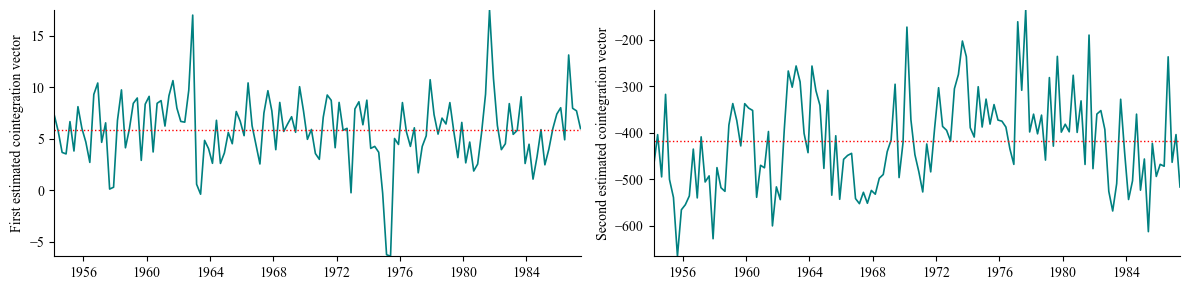

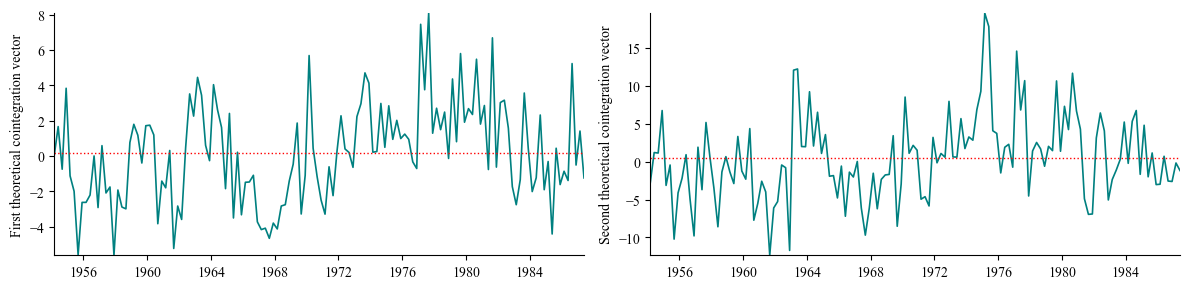

The correlation between coint1 and theo1 is: -0.0412
The correlation between coint2 and theo2 is:  0.5799


In [22]:
coint1 = np.dot(cointegration_vectors[0],np.array(y_clean_data).T)     # need to multiply with -1 to match Matlab
coint2 = np.dot(cointegration_vectors[1],np.array(y_clean_data).T)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
SVAR_IT.setup_axis(axs[0], result['Dates'], coint1, f"First estimated cointegration vector", font_props, "Teal", mean_line=True,special_data_format=[False,10])
SVAR_IT.setup_axis(axs[1], result['Dates'], coint2, f"Second estimated cointegration vector", font_props, "Teal", mean_line=True,special_data_format=[False,10])
plt.tight_layout()
plt.show()

theo1 = np.dot(np.array([0,1,-1,0]),np.array(y_clean_data).T)     # need to multiply with -1 to match Matlab
theo2 = np.dot(np.array([0,0,-1,1]),np.array(y_clean_data).T)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
SVAR_IT.setup_axis(axs[0], result['Dates'], theo1, f"First theoretical cointegration vector", font_props, "Teal", mean_line=True,special_data_format=[False,10])
SVAR_IT.setup_axis(axs[1], result['Dates'], theo2, f"Second theoretical cointegration vector", font_props, "Teal", mean_line=True,special_data_format=[False,10])
plt.tight_layout()
plt.show()

print(f"The correlation between coint1 and theo1 is: {round(np.corrcoef(coint1, theo1)[0, 1],4)}")
print(f"The correlation between coint2 and theo2 is:  {round(np.corrcoef(coint2, theo2)[0, 1],4)}")

## $\text{Q11}$
Impose $r=2$ and the theoretical cointegration vectors and re-estimate the VEC model using the full sample and using your preferred lag length found above. Interpret the adjustment coecients in light of the theoretical cointegration vectors. Do you nd the
expected signs on the adjustment coecients?

In [23]:
for i, val in enumerate(list_of_info):
    print(f"{i}: {val}" + (f" ({list_of_info_latex[i-1]})" if i > 0 else ""))

0: Dates: 1975-2020 (Quarterly)
1: Output (GDP) ($Y_t$)
2: Nominal Interest Rate ($i_t$)
3: Inflation ($\pi_t$)
4: Money Growth ($m_t$)


In [24]:
from Structural_Vector_Autoregressive_Analysis import Identification_Restrictions_Cointegrated_SVAR as SVAR_IRC
SVAR_IRC = SVAR_IRC(Base_initialize,y_dataframe=y_clean_data, horizon = 25, lags=p, Constant=Constant, Trend=Trend, Exogenous=None)
Beta_theory = np.array([[0,1,-1,0],[0,0,-1,1]])
rank = 2

linear_combinations = {"Real Interest": [f"{list_of_info[2]} - {list_of_info[3]}"],
                       "Monetary Base": [f"{list_of_info[4]} - {list_of_info[3]}"]
                       }

print("\nLinear Combinations")
if not linear_combinations:
    linear_combinations = None
    print("  None")
else:
    for name, expressions in linear_combinations.items():
        for expr in expressions:
            print(f"  {name} = {expr}")

The estimated VAR model is stable. The largest absolute eigenvalue is: 0.9995

Linear Combinations
  Real Interest = Nominal Interest Rate - Inflation
  Monetary Base = Money Growth - Inflation


In [25]:
model = 3
beta = SVAR_TC.Initilize_beta_vecm(lags=p,model=model, beta_theory=Beta_theory.T, rank=int(rank)).T
Beta, Betavec, SEBeta, tratioBeta, res, so, so_ml = SVAR_TC.LSKnownBeta(lags=p, beta=beta, model=model)
Beta = Beta.T
tratioBeta = tratioBeta.T

GAMMA = Beta[:,0:K*(p-1)]       # first diff lags
alpha = Aest = Beta[:,K*(p-1):len(Beta.T)-1]   # speed of adjustment

tratioBeta_re = tratioBeta.reshape(-1, Beta.shape[1])
alpha_tratio = tratioBeta_re[:,K*(p-1):len(tratioBeta_re.T)-1]

print("Least Squares:")
print("Alpha estimates:\n",alpha.T,"\n")
print("Alpha t-ratios: \n",alpha_tratio.T)

alpha, Gamma, SigmaML, u = SVAR_IRC.VECMknown(beta=Beta_theory.T)

print("\nMaximum Likelihood ")
print("Alpha estimates: \n",alpha.T)

print("\nEquivalent: ~",np.allclose((alpha - Beta[:,K*(p-1):len(Beta.T)-1]),0))

Least Squares:
Alpha estimates:
 [[-0.0812 -0.2089 0.1718 0.6425]
 [0.1082 0.0985 0.1122 -0.5139]] 

Alpha t-ratios: 
 [[-1.8466 -5.2845 1.4139 3.7965]
 [4.5306 4.5873 1.6998 -5.5927]]

Maximum Likelihood 
Alpha estimates: 
 [[-0.0812 -0.2089 0.1718 0.6425]
 [0.1082 0.0985 0.1122 -0.5139]]

Equivalent: ~ True


## $\text{Q12}$
Suggest an identication scheme including names of the four structural shocks in the VAR/VEC system using a combination of long-run and short-run restrictions. If you cannot provide names for these shocks, try to explain how they aect the data under the maintained assumptions.

In [26]:
SVAR_TC.Identication_Scheme(rank)

Since the rank r = 2, there are 2 transitory/temporary shocks.
Thus, there are K-r = 2 permanent shocks.

    To identify the permanent shocks, we need (K-r)(K-r-1)/2 = 1 restrictions. (Upsilon)
    To identify the transitory shocks, we need r(r-1)/2 = 1 restrictions. (B^{-1}_0)


In [27]:
B_R = """[ * * 0 *
           * * * *
           * * * *
           * * * *]"""

U_R = """[ * 0 0 0
           * * 0 0
           * * 0 0 
           * * 0 0]"""

## $\text{Q13}$
Implement the identication scheme using the Matlab/Python solver of non-linear systems of equations. In Matlab you can use fsolve and in Python either fsolve or least_squares. Check that the solution is valid and compute the variance-covariance matrix of the identied structural shocks. Please, provide the Matlab/Python code you are using to identify the shocks in the appendix. It must include a description of the restrictions you impose to identify the structural model.

If you fail computing the $B^{-1}_0$ matrix using a solver, please use a Cholesky decomposition to compute the $B^{-1}_0$ matrix. Note that it will be impossible to interpret the impulse response function and the variance decomposition using economic theory as the identication is incorrect.

In [28]:
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=rank, beta = Beta_theory.T,ML=False)

invB0 = least_squares(lambda B0inv_flat: SVAR_IRC.Restrictions(B0inv_flat, B0inv_R=B_R, Upsilon_R=U_R, Xi=Xi, SIGMA=SIGMA,Beta=Beta_theory),
                        np.random.randn(K * K))#, xtol=1e-1000000, gtol=1e-1000000, max_nfev=30000)

B0inv = invB0.x.reshape((K, K))
B0inv[:, B0inv.diagonal() < 0] *= -1

print("B_0^{-1}(B_0^{-1})'-\Sigma = 0        ",np.allclose((B0inv @ B0inv.T - SIGMA), 0))
print("\\beta'\\Upsilon = 0                    ",np.allclose((Beta_theory @ Xi @ B0inv), 0))
print("(B_0^{-1} \Sigma @ B_0^{-1})' = I_K   ",np.allclose((np.linalg.inv(B0inv) @ SIGMA @ np.linalg.inv(B0inv).T), np.eye(K)))
Upsilon_solve = Xi @ B0inv
B0inv_solve = B0inv

print("\nB^{-1}_0 =\n",SVAR_IT.To_Matrix(B0inv,short=False))
print("\n\\Upsilon =\n",SVAR_IT.To_Matrix(Xi @ B0inv,short=False))

B_0^{-1}(B_0^{-1})'-\Sigma = 0         True
\beta'\Upsilon = 0                     True
(B_0^{-1} \Sigma @ B_0^{-1})' = I_K    True

B^{-1}_0 =
 \begin{pmatrix}
0.67144 & 0.20894 & 0.00000 & -0.50719 \\
-0.28913 & 0.41283 & -0.56933 & -0.16962 \\
-1.34841 & 1.25967 & 1.07968 & -1.07898 \\
1.51203 & 2.05635 & 1.08265 & 1.85323 \\
\end{pmatrix}

\Upsilon =
 \begin{pmatrix}
1.26490 & -0.00000 & 0.00000 & 0.00000 \\
0.04258 & 0.61972 & -0.00000 & 0.00000 \\
0.04258 & 0.61972 & -0.00000 & 0.00000 \\
0.04258 & 0.61972 & -0.00000 & 0.00000 \\
\end{pmatrix}


## $\text{Q14}$
Compute impulse response functions and forecast error variance decomposition of the data. Focus only on the eects of the permanent shock(s). Use bootstrap (the standard residual based recursive design bootstrap or wild bootstrap) to compute condence intervals based on bootstrap standard error estimates (for the impulse responses) and Efron's percentile intervals (for the variance decomposition). It is important that you clearly state which bootstrap method you use and how you check the order condition in each bootstrap replication. You can show forecast error variance decomposition either in a table or in a graph. Interpret your results and compare to the ndings in Galí. Are permanent shocks more or less important for output that transitory shocks? In case you use a Cholesky decomposition to identify the model, it will be impossible to compare your results to what Galí reports.

In [29]:
irf = SVAR_IRC.IRF(B0inv=B0inv,VEC=True,VAR=False,alpha=alpha,beta=Beta_theory.T)
fevd = SVAR_IRC.FEVD_IRF(irf)

IRF_result = SVAR_IRC.IRF_estimation(IRF_var=irf, list_of_info=list_of_info, normalise=None)
FEVD_result = SVAR_IRC.FEVD_estimation(FEVD_var=fevd, list_of_info=list_of_info, normalise=None)

In [30]:
IRFmat, VCmat = SVAR_IRC.VEC_Bootstrap(Bootstrap = True, 
                                       Bootstrap_type = "Wild", 
                                       Orthogonal = False, 
                                       iterations = None, 
                                       B0inv_R = B_R, 
                                       Upsilon_R = U_R, 
                                       rank = rank,
                                       n_trials=500, 
                                       Beta_theory = Beta_theory, 
                                       Umat = None, 
                                       Upsilon0 = None,
                                       estimator = "Numerical", 
                                       initial_guess = B0inv,
                                       linear_combinations = None) # None or linear_combinations

Initial settings and model checks
      Xi satisfies assumptions
      Identification of transitory shocks is valid
      Solver works correctly.

Numerical Solver (least_squares)

Trial: 500 of 501  |  Failures due to solver: 1 | Failures due to unstable eigenvalue: 0

  Bootstrap based on: 500 trials
  Estimator type in use: Numerical
  Bootstrap type in use: Wild

Total errors: 1
     Errors due to unstable replications: 0
     Errors due to Xi not satisfying assumptions: 0
     Errors due to solver failure to converge: 1


Impulse Response Function
Bootstrap (Wild) Confidence Intervals (Delta)


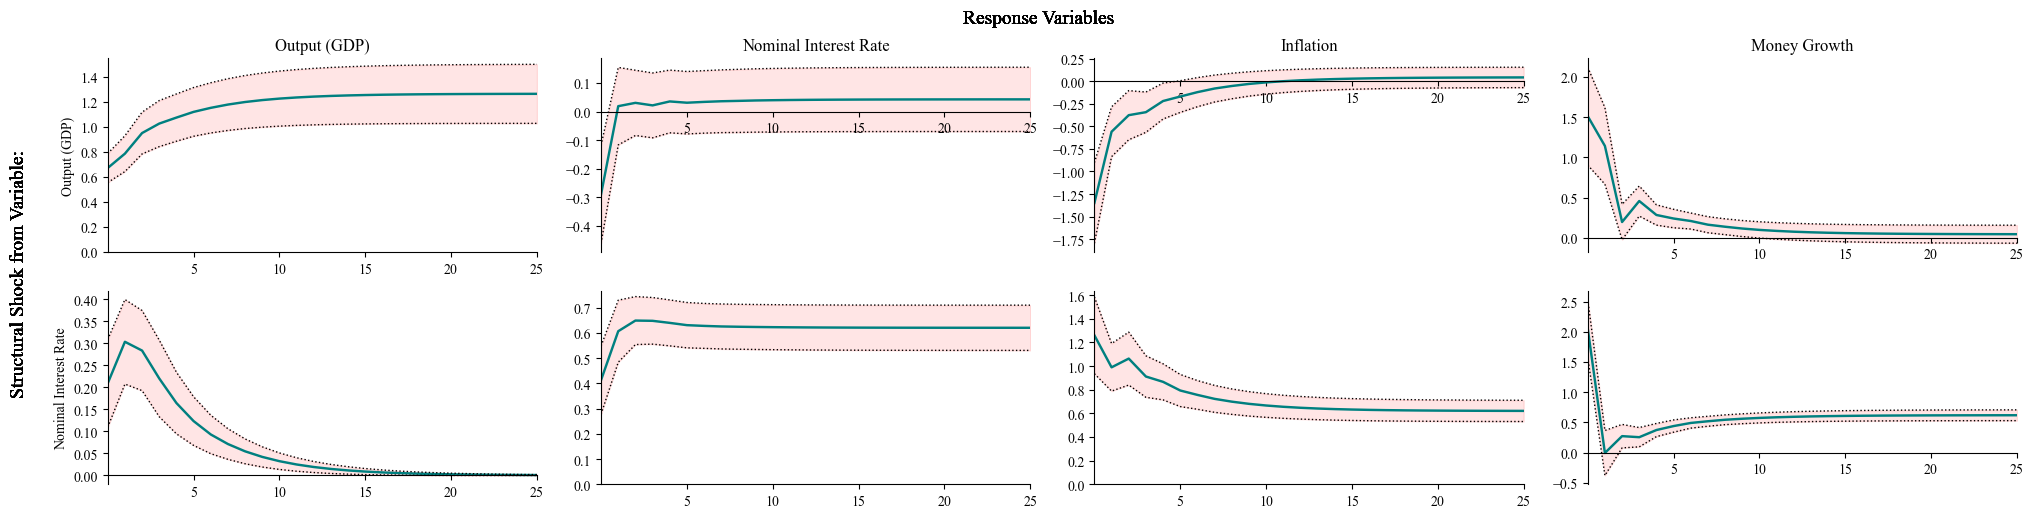

In [31]:
SVAR_IRC.IRF_Combined_Plots(
    linear_combinations = None, # None or linear_combinations
    Bootstrap_Matrix = IRFmat,
    confidence_type = "Delta",  # or "Efron" can be extended.
    responses = [1,2,3,4],      # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [1,2],         # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [68],            # mulitple e.g. z_values=[95,68]
    Baseline = irf,             
    Info="Wild",                # VEC_Bootstrap() setting
    )

Forecast Error Variance Decomposition
Bootstrap (Wild) confidence intervals (Efron)


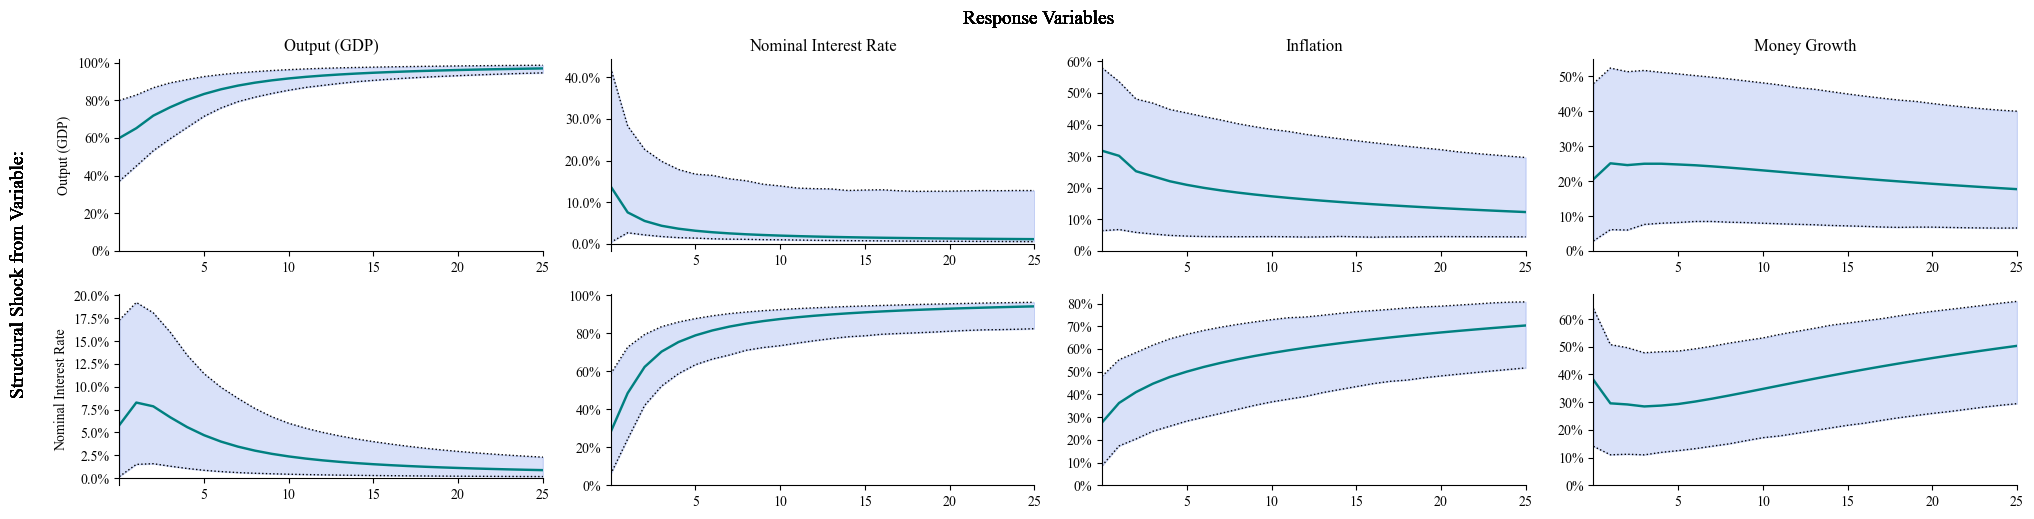

In [32]:
SVAR_IRC.FEVD_Combined_Plots(
    Bootstrap_Matrix = VCmat,
    confidence_type ="Efron", # can be extended.
    responses = [1,2,3,4], # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [1,2],  # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [68], # mulitple e.g. z_values=[95,68]
    Baseline = fevd*100, 
    Info="Wild",
    )

## $\text{Q15}$

Plot the impulse responses of the real interest rate $i_t-\pi_t$ and the monetary base $m_t-\pi_t$ to all shocks and compare to the results in Galí.

In [33]:
IRFmat, VCmat = SVAR_IRC.VEC_Bootstrap(Bootstrap = True, 
                                       Bootstrap_type = "Wild", 
                                       Orthogonal = False, 
                                       iterations = None, 
                                       B0inv_R = B_R, 
                                       Upsilon_R = U_R, 
                                       rank = rank,
                                       n_trials=500, 
                                       Beta_theory = Beta_theory, 
                                       Umat = None, 
                                       Upsilon0 = None,
                                       estimator = "Numerical", 
                                       initial_guess = B0inv,
                                       linear_combinations = linear_combinations) # None or linear_combinations

Initial settings and model checks
      Xi satisfies assumptions
      Identification of transitory shocks is valid
      Solver works correctly.

Numerical Solver (least_squares)

Trial: 500 of 500  |  Failures due to solver: 0 | Failures due to unstable eigenvalue: 0

  Bootstrap based on: 500 trials
  Estimator type in use: Numerical
  Bootstrap type in use: Wild

Total errors: 0
     Errors due to unstable replications: 0
     Errors due to Xi not satisfying assumptions: 0
     Errors due to solver failure to converge: 0


Impulse Response Function
Bootstrap (Wild) Confidence Intervals (Delta)


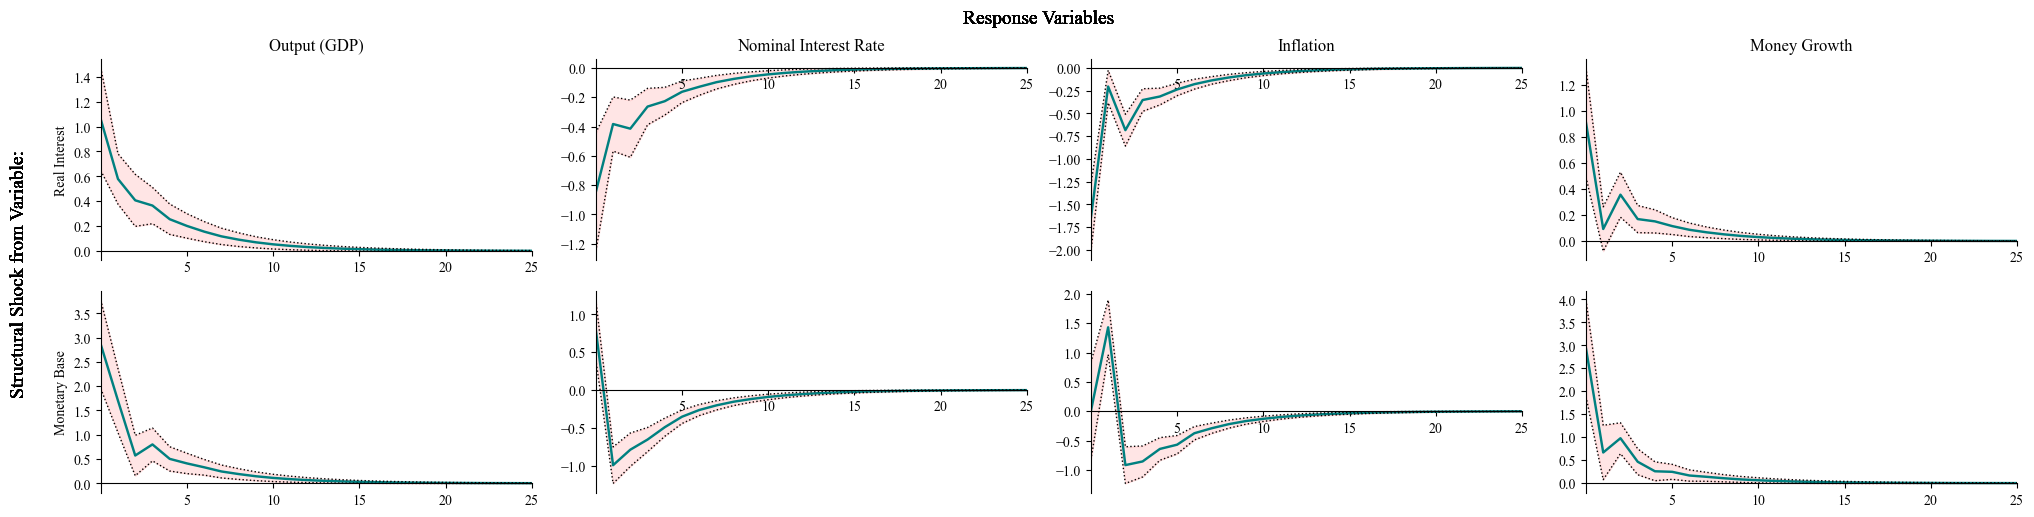

In [34]:
SVAR_IRC.IRF_Combined_Plots(
    linear_combinations = linear_combinations, # None or linear_combinations
    Bootstrap_Matrix = IRFmat,
    confidence_type = "Delta",  # or "Efron" can be extended.
    responses = [1,2,3,4],      # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [2,4],             # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [68],            # mulitple e.g. z_values=[95,68]
    Baseline = irf,             
    Info="Wild",                # VEC_Bootstrap() setting
    )

## $\text{Q16}$

Instead of implementing the theoretical cointegration vector you can use the estimated cointegration vector still imposing $r=2$. Identify the structural shocks and plot the implied impulse responses of output to all four shocks together with condence bands. Compare your results to what you previously found using the theoretical cointegration vector. Comment!

If you fail computing the $B^{-1}_0$ matrix using Matlab/Python, please use a Cholesky decomposition again. However, you may not be able to interpret your results in light of economic theory.

In [35]:
Beta_theory = np.array(cointegration_vectors)
alpha, Gamma, SigmaML, u = SVAR_IRC.VECMknown(beta=Beta_theory.T)

In [36]:
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=rank, beta = Beta_theory.T,ML=False)

invB0 = least_squares(lambda B0inv_flat: SVAR_IRC.Restrictions(B0inv_flat, B0inv_R=B_R, Upsilon_R=U_R, Xi=Xi, SIGMA=SIGMA,Beta=Beta_theory),
                        np.random.randn(K * K)) #xtol=1e-1000000, gtol=1e-1000000, max_nfev=30000)


print("B_0^{-1}(B_0^{-1})'-\Sigma = 0        ",np.allclose((B0inv @ B0inv.T - SIGMA), 0))
print("\\beta'\\Upsilon = 0                    ",np.allclose((Beta_theory @ Xi @ B0inv), 0))
print("(B_0^{-1} \Sigma @ B_0^{-1})' = I_K   ",np.allclose((np.linalg.inv(B0inv) @ SIGMA @ np.linalg.inv(B0inv).T), np.eye(K)))

print("\nB^{-1}_0 =\n",SVAR_IT.To_Matrix(B0inv,short=False))
print("\n\\Upsilon =\n",SVAR_IT.To_Matrix(Xi @ B0inv,short=False))

B_0^{-1}(B_0^{-1})'-\Sigma = 0         False
\beta'\Upsilon = 0                     True
(B_0^{-1} \Sigma @ B_0^{-1})' = I_K    False

B^{-1}_0 =
 \begin{pmatrix}
0.67144 & 0.20894 & 0.00000 & -0.50719 \\
-0.28913 & 0.41283 & -0.56933 & -0.16962 \\
-1.34841 & 1.25967 & 1.07968 & -1.07898 \\
1.51203 & 2.05635 & 1.08265 & 1.85323 \\
\end{pmatrix}

\Upsilon =
 \begin{pmatrix}
1.26566 & 0.07765 & -0.01639 & 0.00257 \\
0.01569 & 0.59700 & 0.06521 & -0.00159 \\
-0.00155 & 0.80779 & 0.08869 & -0.00221 \\
0.03227 & 0.65790 & 0.07157 & -0.00172 \\
\end{pmatrix}


In [37]:
irf = SVAR_IRC.IRF(B0inv=B0inv,VEC=True,VAR=False,alpha=alpha,beta=Beta_theory.T)
fevd = SVAR_IRC.FEVD_IRF(irf)

IRF_result = SVAR_IRC.IRF_estimation(IRF_var=irf, list_of_info=list_of_info, normalise=None)
FEVD_result = SVAR_IRC.FEVD_estimation(FEVD_var=fevd, list_of_info=list_of_info, normalise=None)

In [38]:
IRFmat, VCmat = SVAR_IRC.VEC_Bootstrap(Bootstrap = True, 
                                       Bootstrap_type = "Wi ld", 
                                       Orthogonal = False, 
                                       iterations = None, 
                                       B0inv_R = B_R, 
                                       Upsilon_R = U_R, 
                                       rank = rank,
                                       n_trials=500, 
                                       Beta_theory = Beta_theory, 
                                       Umat = None, 
                                       Upsilon0 = None,
                                       estimator = "Numerical", 
                                       initial_guess = B0inv,
                                       linear_combinations = None) # None or linear_combinations

Initial settings and model checks
      Xi satisfies assumptions
      Identification of transitory shocks is valid
      Solver works correctly.

Numerical Solver (least_squares)

Trial: 500 of 502  |  Failures due to solver: 2 | Failures due to unstable eigenvalue: 0

  Bootstrap based on: 500 trials
  Estimator type in use: Numerical
  Bootstrap type in use: Non parametric

Total errors: 2
     Errors due to unstable replications: 0
     Errors due to Xi not satisfying assumptions: 0
     Errors due to solver failure to converge: 2


Impulse Response Function
Bootstrap (Wild) Confidence Intervals (Delta)


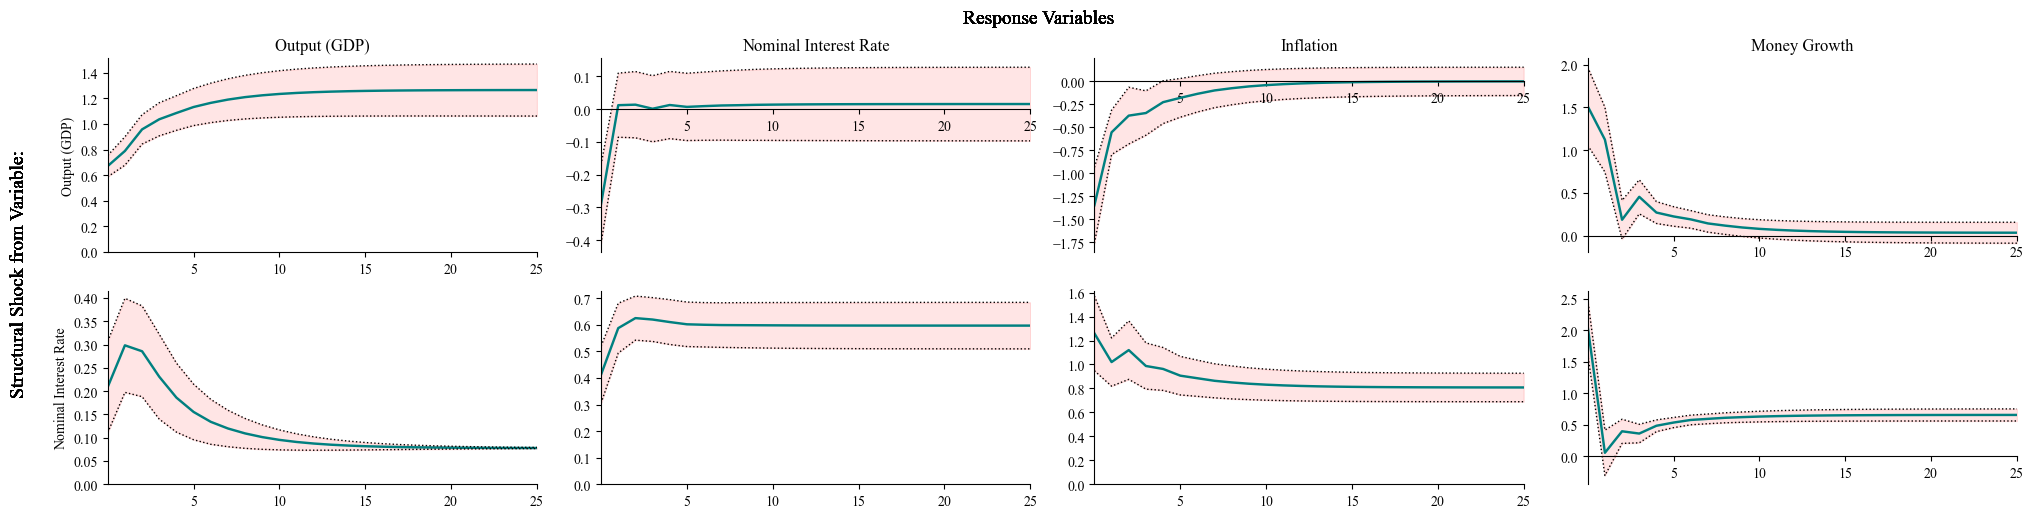

In [39]:
SVAR_IRC.IRF_Combined_Plots(
    linear_combinations = None, # None or linear_combinations
    Bootstrap_Matrix = IRFmat,
    confidence_type = "Delta", # or "Efron" can be extended.
    responses = [1,2,3,4], # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [1,2],  # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [68], # mulitple e.g. z_values=[95,68]
    Baseline = irf, 
    Info="Wild")

In [40]:
IRFmat, VCmat = SVAR_IRC.VEC_Bootstrap(Bootstrap = True, 
                                       Bootstrap_type = "Wi ld", 
                                       Orthogonal = False, 
                                       iterations = None, 
                                       B0inv_R = B_R, 
                                       Upsilon_R = U_R, 
                                       rank = rank,
                                       n_trials=500, 
                                       Beta_theory = Beta_theory, 
                                       Umat = None, 
                                       Upsilon0 = None,
                                       estimator = "Numerical", 
                                       initial_guess = B0inv,
                                       linear_combinations = linear_combinations) # None or linear_combinations

Initial settings and model checks
      Xi satisfies assumptions
      Identification of transitory shocks is valid
      Solver works correctly.

Numerical Solver (least_squares)

Trial: 500 of 503  |  Failures due to solver: 3 | Failures due to unstable eigenvalue: 0

  Bootstrap based on: 500 trials
  Estimator type in use: Numerical
  Bootstrap type in use: Non parametric

Total errors: 3
     Errors due to unstable replications: 0
     Errors due to Xi not satisfying assumptions: 0
     Errors due to solver failure to converge: 3


Impulse Response Function
Bootstrap (Wild) Confidence Intervals (Delta)


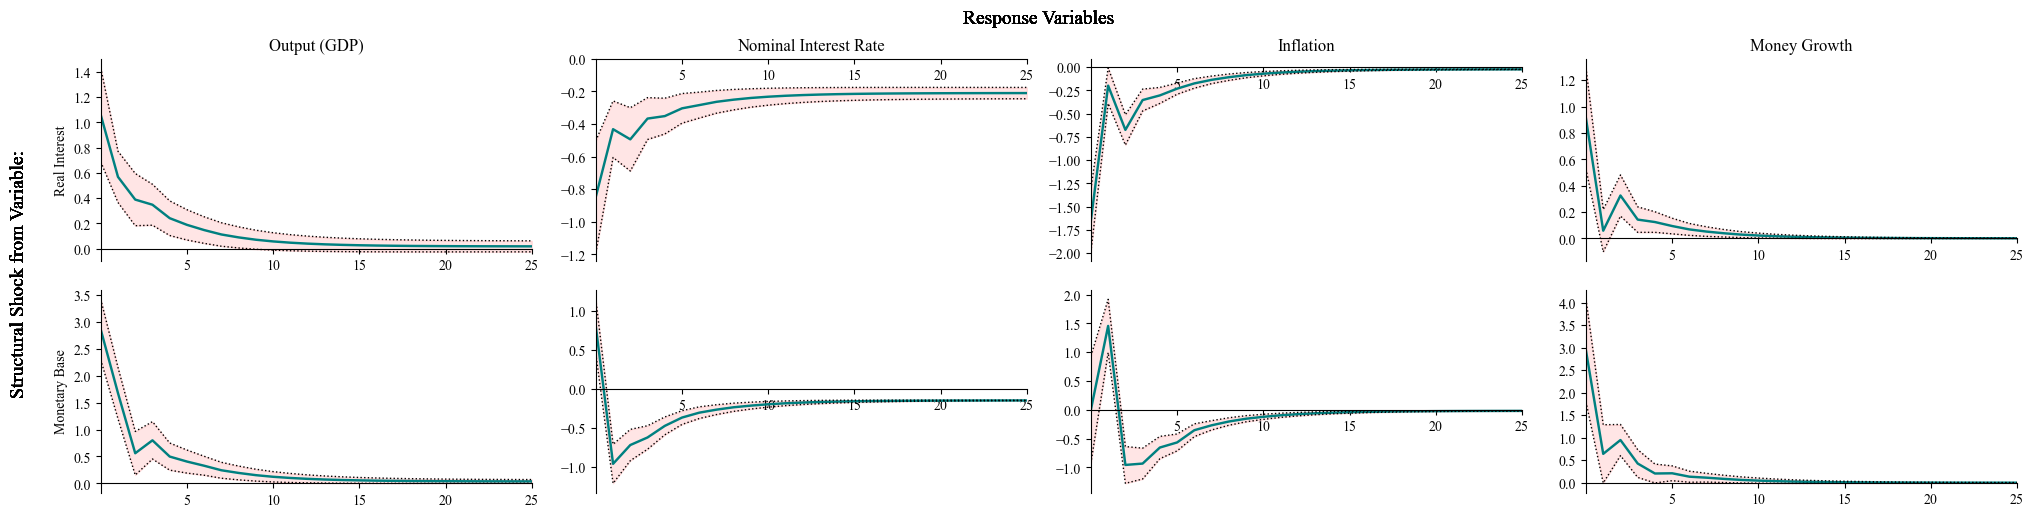

In [41]:
SVAR_IRC.IRF_Combined_Plots(
    linear_combinations = linear_combinations, # None or linear_combinations
    Bootstrap_Matrix = IRFmat,
    confidence_type = "Delta",  # or "Efron" can be extended.
    responses = [1,2,3,4],      # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [2,4],             # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [68],            # mulitple e.g. z_values=[95,68]
    Baseline = irf,             
    Info="Wild",                # VEC_Bootstrap() setting
    )

## $\text{Q17}$

An alternative to using the Matlab/Python solver to compute the $B^{-1}_0$ matrix is to use the approach suggested by Warne (1993). Outline this approach and show how the Warne approach can be used to identify the structural shocks in your preferred VEC model. Discuss both the identication of permanent and transitory shocks.

In [42]:
Beta_theory = np.array([[0,1,-1,0],[0,0,-1,1]])
Aest, _, _, _ = SVAR_IRC.VECMknown(beta=Beta_theory.T)
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=rank, beta = Beta_theory.T, ML=False)

In [43]:
invB0 = least_squares(lambda B0inv_flat: SVAR_IRC.Restrictions(B0inv_flat, B0inv_R=B_R, Upsilon_R=U_R, Xi=Xi, SIGMA=SIGMA,Beta=Beta_theory),
                        np.random.randn(K * K))#, xtol=1e-1000000, gtol=1e-1000000, max_nfev=30000)

B0inv = invB0.x.reshape((K, K))
B0inv[:, B0inv.diagonal() < 0] *= -1

print("B_0^{-1}(B_0^{-1})'-\Sigma = 0        ",np.allclose((B0inv @ B0inv.T - SIGMA), 0))
print("\\beta'\\Upsilon = 0                    ",np.allclose((Beta_theory @ Xi @ B0inv), 0))
print("(B_0^{-1} \Sigma @ B_0^{-1})' = I_K   ",np.allclose((np.linalg.inv(B0inv) @ SIGMA @ np.linalg.inv(B0inv).T), np.eye(K)))
Upsilon_solve = Xi @ B0inv
B0inv_solve = B0inv

print("\nB^{-1}_0 =\n",SVAR_IT.To_Matrix(B0inv,short=False))
print("\n\\Upsilon =\n",SVAR_IT.To_Matrix(Xi @ B0inv,short=False))

B_0^{-1}(B_0^{-1})'-\Sigma = 0         True
\beta'\Upsilon = 0                     True
(B_0^{-1} \Sigma @ B_0^{-1})' = I_K    True

B^{-1}_0 =
 \begin{pmatrix}
0.67144 & 0.20894 & -0.00000 & -0.50719 \\
-0.28913 & 0.41283 & -0.56933 & -0.16962 \\
-1.34841 & 1.25967 & 1.07968 & -1.07898 \\
1.51203 & 2.05635 & 1.08265 & 1.85323 \\
\end{pmatrix}

\Upsilon =
 \begin{pmatrix}
1.26490 & -0.00000 & 0.00000 & -0.00000 \\
0.04258 & 0.61972 & 0.00000 & -0.00000 \\
0.04258 & 0.61972 & 0.00000 & -0.00000 \\
0.04258 & 0.61972 & 0.00000 & -0.00000 \\
\end{pmatrix}


In [44]:
Beta_theory_latex = Matrix(Beta_theory)
Upsilon0_latex = Matrix([[symbols(f"\\Upsilon_{{{i+1}{j+1}}}^0") for j in range(int(K))] for i in range(int(K-rank))])

def matrix_to_latex(matrix):
    return r"\begin{pmatrix}" + r"\\ ".join([" & ".join(map(str, row)) for row in matrix.tolist()]) + r"\end{pmatrix}"

latex_expr = (fr"\begin{{equation}} 0=\underset{{({Beta_theory_latex.shape[0]}\times{int(rank)})}}{{\underset{{{Beta_theory_latex.shape}}}{{\beta'}} \underset{{({int(K)}\times{int(rank)})}}{{\Upsilon_0}}}} = " + matrix_to_latex(Beta_theory_latex) + matrix_to_latex(Upsilon0_latex.T) + "=" + matrix_to_latex(Beta_theory_latex * Upsilon0_latex.T) +r"\end{equation}").replace("*", "\\cdot")
display(Math(latex_expr.replace(", ","\\times ")))

<IPython.core.display.Math object>

In [45]:
Upsilon0 = np.array([[1,0],
                     [0,1],
                     [0,1],
                     [0,1]])

print("Beta @ Upsilon =",(Beta_theory @ Upsilon0)[0], " ~ ", "Valid" if np.all(Beta_theory @ Upsilon0 == 0) else "Not valid")

Beta @ Upsilon = [0 0]  ~  Valid


In [46]:
pipit = np.dot(np.dot(np.dot(np.dot(np.linalg.inv(np.dot(Upsilon0.T,Upsilon0)),Upsilon0.T),Xi),SIGMA),np.dot(np.dot(np.linalg.inv(np.dot(Upsilon0.T,Upsilon0)),Upsilon0.T),Xi).T)            
pimat = np.linalg.cholesky(pipit)

Upsilon = np.dot(Upsilon0,pimat)                       
Fk = np.dot(np.dot(np.linalg.inv(np.dot(Upsilon.T,Upsilon)),Upsilon.T),Xi)
print('Fk matrix\n',Fk)

Umat = np.array([[0,0,1,0],[1,0,0,0]])

if Umat is None:
   Umat = np.zeros((int(rank), K))  # Antager en nulmatrix af størrelse r x K
   for i in range(1, int(rank) + 1):
      Umat[i - 1, K - i] = 1  # Python-indeks starter fra 0

if np.linalg.det(np.dot(Umat,Aest)) == 0:
   print('\n Identification of transitory shock is invalid')
else:
   print('\n Identification of transitory shocks is valid')

xi = np.dot(Aest,np.linalg.inv(np.dot(Umat,Aest)))  

i=0
while i < K:
   j=0
   while j< int(rank):
      if abs(xi[i,j]) < 1E-8: #just to make sure that elements are = 0
         xi[i,j] = 0
      j=j+1
   i=i+1

qr=np.linalg.cholesky(np.dot(np.dot(xi.T,np.linalg.inv(SIGMA)),xi))                   
Fr=np.dot(np.dot(np.linalg.inv(qr),xi.T),np.linalg.inv(SIGMA))
print('\n Fr matrix\n',Fr)

# Putting it all together to compute B0inv
invB0 = np.linalg.inv(np.vstack((Fk,Fr)))
invB0[:, invB0.diagonal() < 0] *= -1


print("\nB_0^{-1}\n",invB0)
print("")
print('\n(1) beta*Xi should be zero\n',np.dot(Beta_theory,Xi))
print('\n(2) beta*Upsilon_0 should be zero\n',np.dot(Beta_theory,Upsilon0))
print('\n(3) C(1)*B0^{-1} should be Upsilon~zeros(K,r)\n',np.dot(-Xi,invB0))
print('\nwhere Upsilon\n',Upsilon)
print('\n(4) Covariance matrix of structural shocks w_t should be I_K\n',np.dot(np.dot(np.linalg.inv(invB0),SIGMA),np.linalg.inv(invB0).T))
print('\nShould be diagonal\n',np.dot(np.dot(np.dot(np.dot(np.linalg.inv(qr),xi.T),np.linalg.inv(SIGMA)),xi),np.linalg.inv(qr.T))    )
print('\nThis compares Upsilon solver and closed form solution\n',Upsilon[:,0:K-int(rank)+1],'\n',Upsilon_solve[:,0:K-int(rank)+1],"\n")
Upsilon_Warne = np.dot(Xi,invB0)
B0inv_Warne = invB0

Fk matrix
 [[0.8051 -0.2182 -0.1995 0.0842]
 [0.1762 0.7355 0.1717 0.2155]]

 Identification of transitory shocks is valid

 Fr matrix
 [[-0.0328 -1.1165 0.2834 0.0539]
 [0.8332 -0.0141 0.1934 -0.2003]]

B_0^{-1}
 [[0.6714 0.2089 -0.0000 -0.5072]
 [-0.2891 0.4128 -0.5693 -0.1696]
 [-1.3484 1.2597 1.0797 -1.0790]
 [1.5120 2.0564 1.0827 1.8532]]


(1) beta*Xi should be zero
 [[-0.0000 0.0000 0.0000 -0.0000]
 [0.0000 -0.0000 -0.0000 -0.0000]]

(2) beta*Upsilon_0 should be zero
 [[0 0]
 [0 0]]

(3) C(1)*B0^{-1} should be Upsilon~zeros(K,r)
 [[-1.2649 -0.0000 0.0000 0.0000]
 [-0.0426 -0.6197 0.0000 0.0000]
 [-0.0426 -0.6197 -0.0000 0.0000]
 [-0.0426 -0.6197 0.0000 0.0000]]

where Upsilon
 [[1.2649 0.0000]
 [0.0426 0.6197]
 [0.0426 0.6197]
 [0.0426 0.6197]]

(4) Covariance matrix of structural shocks w_t should be I_K
 [[1.0000 -0.0000 0.0000 0.0000]
 [-0.0000 1.0000 -0.0000 0.0000]
 [0.0000 -0.0000 1.0000 0.0000]
 [0.0000 0.0000 0.0000 1.0000]]

Should be diagonal
 [[1.0000 -0.0000]
 [-0.00

## $\text{Q18}$

Implement the closed form solution discussed above and compute the implied $B^{-1}_0$ matrix. Is it identical to the one you obtained using a solver? Please, provide the code you are using in the appendix. Note that you are not allowed to use the function `null()` in Matlab/Python to implement your identication.

In [47]:
print("Upsilon  ≈  Upsilon (solve)   ~  ",np.allclose(Upsilon_Warne, Upsilon_solve))
print("B_0^{-1} ≈  B_0^{-1} (solve)  ~  ",np.allclose(B0inv_Warne, B0inv_solve))

print("\nDifference (Maximum)")
print(f"    B_0^{{-1}}:  {np.max(B0inv_Warne - B0inv_solve):.25f}")
print(f"    Upsilon:   {np.max(Upsilon_Warne - Upsilon_solve):.25f}")

def matrix(matrix, name):
    string = f"$$\n{name} = \\begin{{pmatrix}}\n"
    rows, cols = matrix.shape
    for i in range(rows):
        row = " & ".join([f"{matrix[i, j]:.10f}" for j in range(cols)])
        string += row + " \\\\\n"
    string += "\\end{pmatrix}\n$$"
    return string

display(Math(matrix(B0inv_solve, "\\underset{(\\textit{Solver})}{B_{0}^{-1}}")))
display(Math(matrix(B0inv_Warne, "\\underset{(\\textit{Warne})}{B_{0}^{-1}}")))
print("")
display(Math(matrix(Upsilon_solve, "\\underset{(\\textit{Solver})}{\\Upsilon_{0}}")))
display(Math(matrix(Upsilon_Warne, "\\underset{(\\textit{Warne})}{\\Upsilon_{0}}")))

Upsilon  ≈  Upsilon (solve)   ~   True
B_0^{-1} ≈  B_0^{-1} (solve)  ~   True

Difference (Maximum)
    B_0^{-1}:  0.0000000001439126595670359
    Upsilon:   0.0000000000500957053617412


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
if "True" == "True":
    print(matrix(B0inv_solve,   r"\underset{(\textit{Solver})}{B_{0}^{-1}}"),"\n")
    print(matrix(B0inv_Warne,   r"\underset{(\textit{Warne})}{B_{0}^{-1}}" ),"\n")
    print(matrix(Upsilon_solve, r"\underset{(\textit{Solver})}{\Upsilon_0}"),"\n")
    print(matrix(Upsilon_Warne, r"\underset{(\textit{Warne})}{\Upsilon_0}" ),"\n")

$$
\underset{(\textit{Solver})}{B_{0}^{-1}} = \begin{pmatrix}
0.6714415624 & 0.2089413408 & -0.0000000000 & -0.5071886368 \\
-0.2891318624 & 0.4128328447 & -0.5693282749 & -0.1696209190 \\
-1.3484148288 & 1.2596744976 & 1.0796779314 & -1.0789803283 \\
1.5120257328 & 2.0563531443 & 1.0826524332 & 1.8532259286 \\
\end{pmatrix}
$$ 

$$
\underset{(\textit{Warne})}{B_{0}^{-1}} = \begin{pmatrix}
0.6714415625 & 0.2089413408 & -0.0000000000 & -0.5071886367 \\
-0.2891318624 & 0.4128328447 & -0.5693282749 & -0.1696209189 \\
-1.3484148286 & 1.2596744976 & 1.0796779314 & -1.0789803282 \\
1.5120257326 & 2.0563531443 & 1.0826524332 & 1.8532259285 \\
\end{pmatrix}
$$ 

$$
\underset{(\textit{Solver})}{\Upsilon_0} = \begin{pmatrix}
1.2649039106 & -0.0000000000 & 0.0000000000 & -0.0000000000 \\
0.0425792261 & 0.6197227281 & 0.0000000000 & -0.0000000000 \\
0.0425792261 & 0.6197227281 & 0.0000000000 & -0.0000000000 \\
0.0425792261 & 0.6197227281 & 0.0000000000 & -0.0000000000 \\
\end{pmatrix}
$$ 

$$
\und